Polynomial Regression
===


    Used to increrase performance of the model if its not changing even after increasing training data size and changing random state
    
    Must have only 1 input feature

    Increase degree of the feature using polynomial equation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/devjith/Luminar/Machine Learning/files/poly.csv")

In [3]:
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [4]:
df = df.drop(columns='sno')

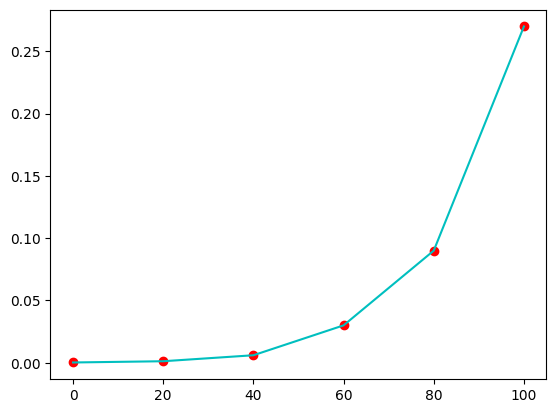

In [5]:
plt.plot(df['Temperature'].values,df['Pressure'].values,c='c')
plt.scatter(df['Temperature'].values,df['Pressure'].values,c='r',marker='o')

<BarContainer object of 6 artists>

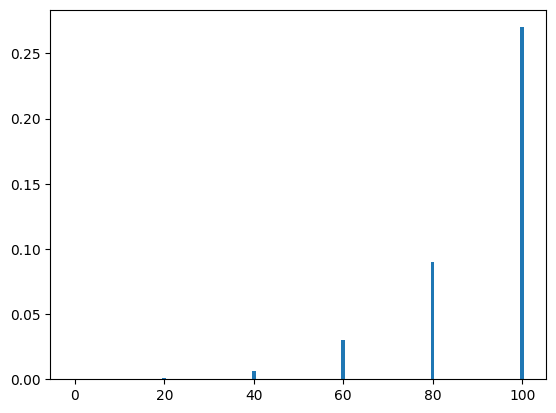

In [6]:
plt.bar(df['Temperature'].values,df['Pressure'].values)

In [7]:
x = df.iloc[:,:-1]
x

,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [8]:
y = df.iloc[:,-1]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_pred = model.predict(x)

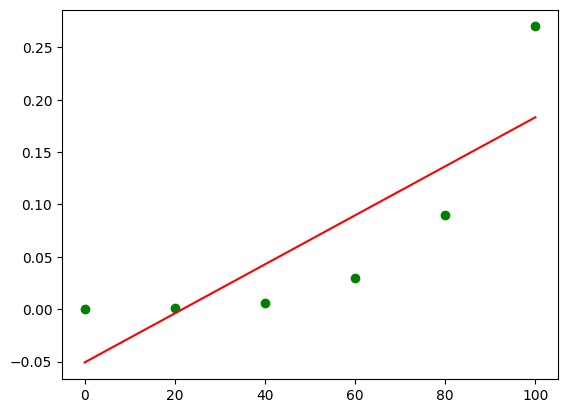

In [13]:
plt.scatter(x,y,color='g')
plt.plot(x,y_pred,color='r')

In [11]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mape = mean_absolute_percentage_error(y,y_pred)
r2 = r2_score(y,y_pred)
mape,r2

(44.775078189300416, 0.690349972603981)

After applying polynomial
---

In [25]:
from sklearn.preprocessing import PolynomialFeatures
feature = PolynomialFeatures(degree=2)
x_poly = feature.fit_transform(x)

In [26]:
model_poly = LinearRegression()
model_poly.fit(x_poly,y)
y_poly_predict = model_poly.predict(x_poly)

In [27]:
mape = mean_absolute_percentage_error(y,y_poly_predict)
r2 = r2_score(y,y_poly_predict)
mape,r2

(15.926055555558056, 0.9568461098911795)

In [29]:
df2 = pd.DataFrame(
    {
        "Acutal value": y,
        "Simple Linear Prediction": y_pred,
        "Polynomial Prediction": y_poly_predict

    }
)

In [30]:
df2

,Acutal value,Simple Linear Prediction,Polynomial Prediction
0,0.0002,-0.050867,0.01555
1,0.0012,-0.004027,-0.01731
2,0.0060,0.042813,-0.01032
3,0.0300,0.089653,0.03652
4,0.0900,0.136493,0.12321
5,0.2700,0.183333,0.24975


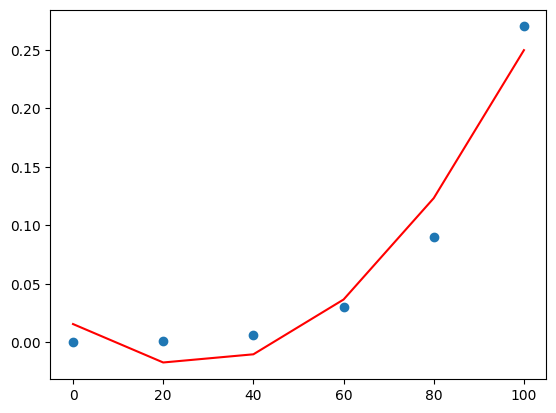

In [34]:
plt.scatter(x,y)
plt.plot(x,y_poly_predict,color='r')

